In [83]:
from pyphoon2.DigitalTyphoonDataset import DigitalTyphoonDataset as DTD
from torchvision import transforms as T

transforms = T.Compose([
    T.ToTensor(),
    T.Resize(256),
    T.RandomApply([T.GaussianBlur(3, [.1, 2.])], p=0.5),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomVerticalFlip(p=0.5),
    T.Normalize(mean=269.15, std=24.14),
])

def transform_func(obj):
    img, labels = obj
    return transforms(img), labels-3


dataset = DTD(image_dir="/fs9/gaspar/data/WP/image/",
              metadata_dir="/fs9/gaspar/data/WP/metadata/",
              metadata_json="/fs9/gaspar/data/WP/metadata.json",
              get_images_by_sequence=False,
              labels="grade",#("year", "month", "day", "hour", "grade"),#("grade", "pressure", "wind"),
              split_dataset_by="sequence",
              load_data_into_memory='track',
              filter_func= lambda x: x.grade() > 2 and x.grade() < 6,
              transform=transform_func,
              ignore_list=[],
              verbose=False)

In [84]:
len(dataset)

117326

In [86]:
img, label = dataset[0]

In [87]:
img.shape

torch.Size([1, 256, 256])

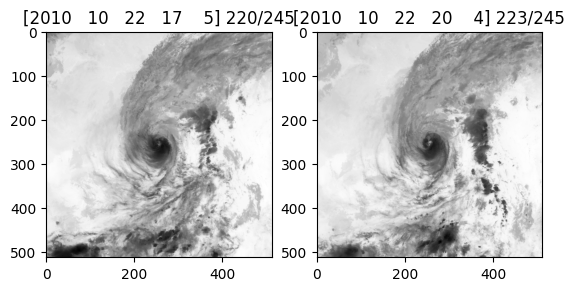

In [78]:
import numpy as np
import matplotlib.pyplot as plt


images, labels = dataset[789]
s = len(labels)

fig, axs = plt.subplots(1, 2)

spl = 220#np.random.randint(s)
axs[0].set_title(str(labels[spl]) + f" {spl}/{s}")
axs[0].imshow(images[spl], cmap="grey")
spl = np.min((s-1, spl+np.random.randint(1,4)))
axs[1].set_title(str(labels[spl]) + f" {spl}/{s}")
axs[1].imshow(images[spl], cmap="grey")


In [79]:
print(dataset[0])

(array([[[264.62312688, 262.17101141, 260.28729136, ..., 239.46959857,
         247.28204447, 246.53614945],
        [262.79028384, 259.6503854 , 259.0088754 , ..., 248.02089293,
         246.53614945, 245.78297696],
        [260.91960232, 259.0088754 , 260.28729136, ..., 252.31465792,
         249.47790431, 245.02235852],
        ...,
        [283.79221673, 283.29085665, 283.79221673, ..., 291.0566277 ,
         291.0566277 , 291.0566277 ],
        [284.29130734, 284.29130734, 284.29130734, ..., 291.0566277 ,
         291.0566277 , 291.0566277 ],
        [284.78816177, 284.78816177, 285.28284459, ..., 291.0566277 ,
         291.0566277 , 291.0566277 ]],

       [[268.18361425, 267.59944385, 268.18361425, ..., 227.82774944,
         229.75505828, 232.54561304],
        [267.59944385, 265.82499062, 263.40531007, ..., 227.82774944,
         232.54561304, 231.6285279 ],
        [260.28729136, 259.6503854 , 260.28729136, ..., 227.82774944,
         229.75505828, 236.09409902],
        ...,